In [1]:
from bioinfokit import visuz
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/xinsongdu/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import math

In [35]:
# load data
data = pd.read_csv('../results/R_outputs/pos_100_withbg_ready.csv')

In [4]:
fat_names = ["X10_BLS010A_p_mzXML_Peak_height", "X4_BLS002A_p_mzXML_Peak_height", "X1_BLS001A_p_mzXML_Peak_height", "X7_BLS003A_p_mzXML_Peak_height"]
whole_names = ["X12_BLS010A_p_mzXML_Peak_height", "X6_BLS002A_p_mzXML_Peak_height", "X3_BLS001A_p_mzXML_Peak_height", "X9_BLS003A_p_mzXML_Peak_height"]
skim_names = ["X11_BLS010A_p_mzXML_Peak_height", "X5_BLS002A_p_mzXML_Peak_height", "X2_BLS001A_p_mzXML_Peak_height", "X8_BLS003A_p_mzXML_Peak_height"]

In [5]:
data.head()

,row_ID,row_m_z,row_retention_time,flag_fat_threshold_005,flag_skim_threshold_005,flag_whole_threshold_005,flag_fat_threshold_100,flag_skim_threshold_100,flag_whole_threshold_100,flag_fat_threshold_200,flag_skim_threshold_200,flag_whole_threshold_200,row_ID_anova,f_value_anova,p_value_f_anova,mean_fat_anova,mean_skim_anova,mean_whole_anova,sd_fat_anova,sd_skim_anova,sd_whole_anova,mean_skim_fat_anova,mean_whole_skim_anova,mean_whole_fat_anova,p_value_skim_fat_anova,p_value_whole_skim_anova,p_value_whole_fat_anova,flag_skim_fat_anova,flag_whole_skim_anova,flag_whole_fat_anova,row_ID_kruskalwallis,k_value_kruskalwallis,p_value_k_kruskalwallis,mean_fat_kruskalwallis,mean_skim_kruskalwallis,mean_whole_kruskalwallis,sd_fat_kruskalwallis,sd_skim_kruskalwallis,sd_whole_kruskalwallis,mean_skim_fat_kruskalwallis,mean_whole_skim_kruskalwallis,mean_whole_fat_kruskalwallis,p_value_skim_fat_kruskalwallis,p_value_whole_skim_kruskalwallis,p_value_whole_fat_kruskalwallis,flag_skim_fat_kruskalwallis,flag_whole_skim_kruskalwallis,flag_whole_fat_kruskalwallis,row_identity,row_number_of_detected_peaks,row_comment,X1_Blank_n_mzXML_Peak_height,X2_Blank_n_mzXML_Peak_height,X3_Blank_n_mzXML_Peak_height,X4_Blank_n_mzXML_Peak_height,X1_extBlank_n_mzXML_Peak_height,X2_extBlank_n_mzXML_Peak_height,X3_extBlank_n_mzXML_Peak_height,X4_extBlank_n_mzXML_Peak_height,X1_NeatQC_n_mzXML_Peak_height,X2_NeatQC_n_mzXML_Peak_height,X1_BLS001A_n_mzXML_Peak_height,X10_BLS010A_n_mzXML_Peak_height,X11_BLS010A_n_mzXML_Peak_height,X12_BLS010A_n_mzXML_Peak_height,X2_BLS001A_n_mzXML_Peak_height,X4_BLS002A_n_mzXML_Peak_height,X7_BLS003A_n_mzXML_Peak_height,X3_BLS001A_n_mzXML_Peak_height,X5_BLS002A_n_mzXML_Peak_height,X8_BLS003A_n_mzXML_Peak_height,X9_BLS003A_n_mzXML_Peak_height,X6_BLS002A_n_mzXML_Peak_height,X1_BLS001A_n_dd_mzXML_Peak_height,X2_BLS001A_n_dd_mzXML_Peak_height,X3_BLS001A_n_dd_mzXML_Peak_height,label,foldchange_whole_skim,foldchange_whole_fat,foldchange_skim_fat,logfoldchange_whole_skim,logfoldchange_whole_fat,logfoldchange_skim_fat,logpvalue_whole_fat,logpvalue_whole_skim,logpvalue_skim_fat
0,rowID_101,191.019372,1.858635,0,0,0,0,0,0,0,0,0,rowID_101,11.379071,0.003434,9.824681e+08,1.851242e+09,1.801174e+09,3.782646e+08,2.251725e+08,2.390020e+08,8.687737e+08,-5.006785e+07,8.187059e+08,0.005467,0.967612,0.007821,1,0,1,rowID_101,7.384615,0.024914,9.824681e+08,1.851242e+09,1.801174e+09,3.782646e+08,2.251725e+08,2.390020e+08,8.687737e+08,-5.006785e+07,8.187059e+08,0.020921,1.000000,0.020921,1,0.0,1,"""""",25,NaN,216713.640625,444563.774107,427734.255357,502914.641964,2.617004e+06,2.841137e+06,2.926918e+06,2.885662e+06,6.792426e+08,6.627500e+08,1.131640e+09,1.444650e+09,1.546406e+09,1.577209e+09,1.982663e+09,7.338486e+08,6.197337e+08,2.062402e+09,2.053869e+09,1.822029e+09,1.620878e+09,1.944207e+09,1.179581e+09,1.932052e+09,1.826852e+09,191.02/1.86,-1.027797,1.833316,1.884277,-0.027418,0.606126,0.633544,4.850998,0.032924,5.209049
1,rowID_1969,191.019381,1.139336,0,0,0,0,0,0,0,0,0,rowID_1969,9.960362,0.005232,1.495885e+08,3.207020e+08,3.074723e+08,7.934618e+07,4.934080e+07,4.679078e+07,1.711135e+08,-1.322971e+07,1.578838e+08,0.007735,0.948666,0.012293,1,0,1,rowID_1969,6.730769,0.034549,1.495885e+08,3.207020e+08,3.074723e+08,7.934618e+07,4.934080e+07,4.679078e+07,1.711135e+08,-1.322971e+07,1.578838e+08,0.020921,0.563703,0.043308,1,0.0,1,"""""",17,NaN,143604.265625,75829.937500,56655.011719,124003.062500,9.302420e+04,7.707701e+04,9.158514e+04,1.158551e+05,5.225600e+06,3.048453e+06,1.650442e+08,2.546071e+08,2.616023e+08,2.890292e+08,3.789454e+08,1.028169e+08,7.588584e+07,3.625084e+08,3.355887e+08,3.066714e+08,2.536125e+08,3.247390e+08,1.580133e+08,3.606205e+08,3.323964e+08,191.02/1.14,-1.043027,2.055454,2.143895,-0.042127,0.720497,0.762624,4.398750,0.052699,4.862017
2,rowID_538,167.020784,1.769228,0,0,0,0,0,0,0,0,0,rowID_538,3.533172,0.073699,9.444981e+07,1.440250e+08,1.422818e+08,3.915158e+07,2.816519e+07,1.902373e+07,4.957515e+07,-1.743180e+06,4.783197e+07,0.100368,0.99

In [6]:
data.columns

Index(['row_ID', 'row_m_z', 'row_retention_time', 'flag_fat_threshold_005',
       'flag_skim_threshold_005', 'flag_whole_threshold_005',
       'flag_fat_threshold_100', 'flag_skim_threshold_100',
       'flag_whole_threshold_100', 'flag_fat_threshold_200',
       'flag_skim_threshold_200', 'flag_whole_threshold_200', 'row_ID_anova',
       'f_value_anova', 'p_value_f_anova', 'mean_fat_anova', 'mean_skim_anova',
       'mean_whole_anova', 'sd_fat_anova', 'sd_skim_anova', 'sd_whole_anova',
       'mean_skim_fat_anova', 'mean_whole_skim_anova', 'mean_whole_fat_anova',
       'p_value_skim_fat_anova', 'p_value_whole_skim_anova',
       'p_value_whole_fat_anova', 'flag_skim_fat_anova',
       'flag_whole_skim_anova', 'flag_whole_fat_anova', 'row_ID_kruskalwallis',
       'k_value_kruskalwallis', 'p_value_k_kruskalwallis',
       'mean_fat_kruskalwallis', 'mean_skim_kruskalwallis',
       'mean_whole_kruskalwallis', 'sd_fat_kruskalwallis',
       'sd_skim_kruskalwallis', 'sd_whole_kruskalw

In [7]:
def fold_change(row, left, right):
    if row[right] == 0:
        return np.inf
    elif row[left] == 0:
        return -np.inf
    else:
        result = row[left]/row[right]
        return result if result >=1 else -1/result

In [8]:
def add_label(row):
    if row.row_identity == '""':
        return str(round(row["row_m_z"],2)) + "/" + str(round(row["row_retention_time"], 2))
    else:
        return row.row_identity

In [9]:
data['label'] = data.apply(lambda row: add_label(row), axis = 1)

In [10]:
data["foldchange_whole_skim"] = data.apply(lambda row: fold_change(row, 'mean_whole_anova', 'mean_skim_anova'), axis = 1)

In [11]:
data["foldchange_whole_fat"] = data.apply(lambda row: fold_change(row, 'mean_whole_anova', 'mean_fat_anova'), axis = 1)

In [12]:
data["foldchange_skim_fat"] = data.apply(lambda row: fold_change(row, 'mean_skim_anova', 'mean_fat_anova'), axis = 1)

In [13]:
data["logfoldchange_whole_skim"] = np.log2(data['mean_whole_anova']/data['mean_skim_anova'])

In [14]:
data["logfoldchange_whole_fat"] = np.log2(data['mean_whole_anova']/data['mean_fat_anova'])

In [15]:
data["logfoldchange_skim_fat"] = np.log2(data['mean_skim_anova']/data['mean_fat_anova'])

In [16]:
data["logpvalue_whole_fat"] = -np.log10(data['p_value_whole_fat_anova'])

In [17]:
data["logpvalue_whole_skim"] = -np.log10(data['p_value_whole_skim_anova'])

In [18]:
data["logpvalue_skim_fat"] = -np.log10(data['p_value_skim_fat_anova'])

In [19]:
# data.to_csv('../data/milk_data_pos_ph_summaries_filter_allgroups_threshold_100_modified.csv', index = False)

## Plots

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
plt.rcParams['figure.figsize'] = [10, 10]

#### volcano

In [5]:
visuz.volcano(table='../data/milk_data_pos_ph_summaries_filter_allgroups_threshold_100_modified.csv', lfc="foldchange_fat_whole", pv="logpvalue_whole_fat")

#### Venn diagram elements - Intersection shows different peaks

In [23]:
n_groups = 3

In [82]:
# Fat && Skim
skim_fat = data[(data.p_value_f_anova<0.05) & 
     (data.p_value_whole_fat_anova>0.05) & 
     (data.p_value_whole_skim_anova>0.05) & 
     (data.p_value_skim_fat_anova<0.05) &
     (abs(data.foldchange_skim_fat)>2)]

In [83]:
# Fat && Skim (old)
# fat_skim = data[(data.mean_fat_anova > data.mean_whole_anova) & 
#      (data.p_value_f_anova<0.05) & 
#      (data.p_value_whole_fat_anova<0.05) & 
#      (data.p_value_whole_skim_anova<0.05) & 
#      (data.p_value_skim_fat_anova>0.05)]

In [84]:
len(skim_fat)

280

In [85]:
# Fat && Whole 
whole_fat = data[(data.p_value_f_anova<0.05) & 
     (data.p_value_whole_fat_anova<0.05) & 
     (data.p_value_whole_skim_anova>0.05) & 
     (data.p_value_skim_fat_anova>0.05) &
     (abs(data.foldchange_whole_fat)>2)]

In [86]:
# Fat && Whole (old)
# fat_whole = data[(data.mean_fat_anova > data.mean_skim_anova) & 
#      (data.p_value_f_anova<0.05) & 
#      (data.p_value_skim_fat_anova<0.05) & 
#      (data.p_value_whole_skim_anova<0.05) & 
#      (data.p_value_whole_fat_anova>0.05)]

In [87]:
len(whole_fat)

65

In [88]:
# Skim && Whole
whole_skim = data[(data.p_value_f_anova<0.05) & 
     (data.p_value_whole_fat_anova>0.05) & 
     (data.p_value_whole_skim_anova<0.05) & 
     (data.p_value_skim_fat_anova>0.05) & 
     (abs(data.foldchange_whole_skim)>2)]

In [89]:
# Skim && Whole (old)
# skim_whole = data[(data.mean_whole_anova > data.mean_fat_anova) & 
#      (data.p_value_f_anova<0.05) & 
#      (data.p_value_skim_fat_anova<0.05) & 
#      (data.p_value_whole_fat_anova<0.05) & 
#      (data.p_value_whole_skim_anova>0.05)]

In [90]:
len(whole_skim)

30

In [91]:
# Fat

fat = data[(data.p_value_f_anova<0.05) & 
     (data.p_value_whole_fat_anova<0.05) & 
     (data.p_value_whole_skim_anova>0.05) & 
     (data.p_value_skim_fat_anova<0.05) & 
     (abs(data.foldchange_whole_fat)>2) &
     (abs(data.foldchange_skim_fat)>2)]

In [92]:
# Fat (old)
# fat = data[(data.mean_fat_anova > data.mean_whole_anova) & 
#          (data.mean_fat_anova > data.mean_skim_anova) & 
#          (data.p_value_f_anova<0.05) & 
#          (data.p_value_skim_fat_anova<0.05) & 
#          (data.p_value_whole_fat_anova<0.05)]

In [93]:
len(fat)

468

In [94]:
# Skim

skim = data[(data.p_value_f_anova<0.05) & 
     (data.p_value_whole_fat_anova>0.05) & 
     (data.p_value_whole_skim_anova<0.05) & 
     (data.p_value_skim_fat_anova<0.05) & 
     (abs(data.foldchange_whole_skim)>2) &
     (abs(data.foldchange_skim_fat)>2)]

In [95]:
# Skim (old)
# skim = data[(data.mean_skim_anova > data.mean_fat_anova) & 
#          (data.mean_skim_anova > data.mean_whole_anova) & 
#          (data.p_value_f_anova<0.05) & 
#          (data.p_value_skim_fat_anova<0.05) & 
#          (data.p_value_whole_skim_anova<0.05)]

In [96]:
len(skim)

17

In [97]:
# Whole

whole = data[(data.p_value_f_anova<0.05) & 
     (data.p_value_whole_fat_anova<0.05) & 
     (data.p_value_whole_skim_anova<0.05) & 
     (data.p_value_skim_fat_anova>0.05) & 
     (abs(data.foldchange_whole_skim)>2) &
     (abs(data.foldchange_whole_fat)>2)]

In [98]:
# Whole (old)
# whole = data[(data.mean_whole_anova > data.mean_fat_anova) & 
#          (data.mean_whole_anova > data.mean_skim_anova) & 
#          (data.p_value_f_anova<0.05) & 
#          (data.p_value_whole_fat_anova<0.05) & 
#          (data.p_value_whole_skim_anova<0.05)]

In [99]:
len(whole)

8

In [100]:
# common = data[data.p_value_f_anova>0.05]
different = data[(data.p_value_f_anova<0.05) & 
     (data.p_value_whole_fat_anova<0.05) & 
     (data.p_value_whole_skim_anova<0.05) & 
     (data.p_value_skim_fat_anova<0.05) & 
     (abs(data.foldchange_whole_skim)>2) &
     (abs(data.foldchange_skim_fat)>2) &
     (abs(data.foldchange_whole_fat)>2)]

In [101]:
# len(common)
len(different)

0

In [102]:
# Other
len(data[(data.p_value_f_anova<0.05) & 
    (data.p_value_skim_fat_anova>0.05) & 
    (data.p_value_whole_fat_anova>0.05) & 
    (data.p_value_whole_skim_anova>0.05)])

127

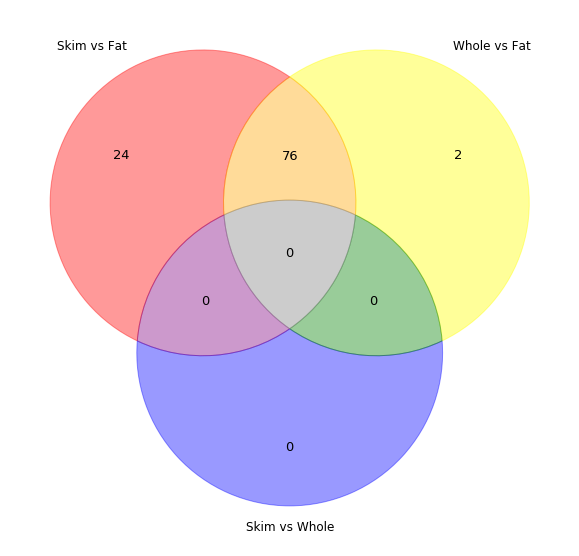

In [42]:
from matplotlib_venn import venn3

v3 = venn3(subsets = {'100':30, '010':30, '110':17,
                      '001':30, '101':17, '011':17, '111':5},
           set_labels = ('Skim vs Fat', 'Whole vs Fat', 'Whole vs Skim'))

v3.get_patch_by_id('100').set_color('red')
v3.get_patch_by_id('010').set_color('yellow')
v3.get_patch_by_id('001').set_color('blue')
v3.get_patch_by_id('110').set_color('orange')
v3.get_patch_by_id('101').set_color('purple')
v3.get_patch_by_id('011').set_color('green')
v3.get_patch_by_id('111').set_color('grey')

v3.get_label_by_id('100').set_text(str(len(skim_fat)))
v3.get_label_by_id('010').set_text(str(len(whole_fat)))
v3.get_label_by_id('001').set_text(str(len(whole_skim)))
v3.get_label_by_id('110').set_text(str(len(fat)))
v3.get_label_by_id('101').set_text(str(len(skim)))
v3.get_label_by_id('011').set_text(str(len(whole)))
v3.get_label_by_id('111').set_text(str(len(different)))

for text in v3.subset_labels:
    text.set_fontsize(13)

plt.show()

#### venn diagram - Intersection shows common peaks

In [36]:
# Fat && Skim
skim_fat = data[(data.flag_fat_threshold_100==0) & 
     (data.flag_skim_threshold_100==0) & 
     (data.flag_whole_threshold_100==1)]

In [37]:
# Fat && Whole 
whole_fat = data[(data.flag_fat_threshold_100==0) & 
     (data.flag_skim_threshold_100==1) & 
     (data.flag_whole_threshold_100==0)]

In [38]:
# Skim && Whole
whole_skim = data[(data.flag_fat_threshold_100==1) & 
     (data.flag_skim_threshold_100==0) & 
     (data.flag_whole_threshold_100==0)]

In [39]:
# Fat

fat = data[(data.flag_fat_threshold_100==0) & 
     (data.flag_skim_threshold_100==1) & 
     (data.flag_whole_threshold_100==1)]

In [40]:
# Skim

skim = data[(data.flag_fat_threshold_100==1) & 
     (data.flag_skim_threshold_100==0) & 
     (data.flag_whole_threshold_100==1)]

In [41]:
# Whole

whole = data[(data.flag_fat_threshold_100==1) & 
     (data.flag_skim_threshold_100==1) & 
     (data.flag_whole_threshold_100==0)]

In [42]:
# common = data[data.p_value_f_anova>0.05]
common = data[(data.flag_fat_threshold_100==0) & 
     (data.flag_skim_threshold_100==0) & 
     (data.flag_whole_threshold_100==0)]

In [43]:
len(data)

814

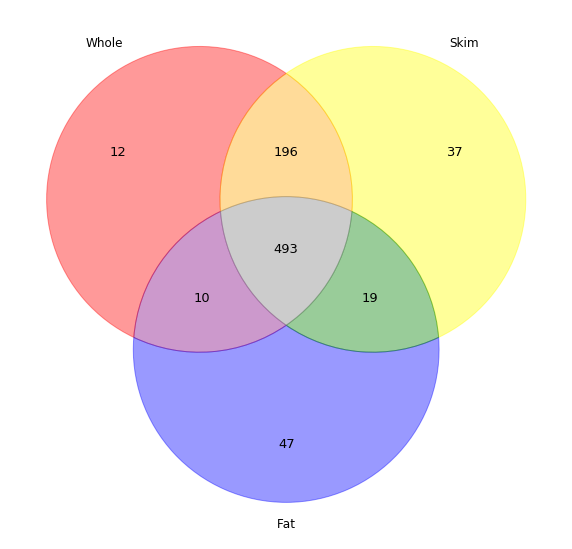

In [44]:
from matplotlib_venn import venn3

v3 = venn3(subsets = {'100':30, '010':30, '110':17,
                      '001':30, '101':17, '011':17, '111':5},
           set_labels = ('Whole', 'Skim', 'Fat'))

v3.get_patch_by_id('100').set_color('red')
v3.get_patch_by_id('010').set_color('yellow')
v3.get_patch_by_id('001').set_color('blue')
v3.get_patch_by_id('110').set_color('orange')
v3.get_patch_by_id('101').set_color('purple')
v3.get_patch_by_id('011').set_color('green')
v3.get_patch_by_id('111').set_color('grey')

v3.get_label_by_id('100').set_text(str(len(whole)))
v3.get_label_by_id('010').set_text(str(len(skim)))
v3.get_label_by_id('001').set_text(str(len(fat)))
v3.get_label_by_id('110').set_text(str(len(whole_skim)))
v3.get_label_by_id('101').set_text(str(len(whole_fat)))
v3.get_label_by_id('011').set_text(str(len(skim_fat)))
v3.get_label_by_id('111').set_text(str(len(common)))

for text in v3.subset_labels:
    text.set_fontsize(13)

plt.show()

#### Heatmap

In [162]:
def add_label(row):
    return str(round(row["row_m_z"],2)) + "/" + str(round(row["row_retention_time"], 2))

In [163]:
data['label'] = data.apply(lambda row: add_label(row), axis = 1)

In [21]:
peaks = data['label'].tolist()

In [22]:
samples = ["mean_skim_anova", "mean_whole_anova", "mean_fat_anova"]

In [23]:
data[samples].as_matrix()

array([[1.19915634e+09, 1.14051502e+09, 7.70987510e+08],
       [7.40428017e+08, 6.88475846e+08, 4.69999614e+08],
       [8.51531096e+08, 8.15411227e+08, 4.45522986e+08],
       ...,
       [2.19738926e+04, 8.54862561e+03, 1.38505254e+06],
       [1.64566063e+05, 2.59886667e+05, 1.23675549e+06],
       [7.87087671e+03, 1.14990930e+03, 9.06956810e+05]])

In [24]:
import seaborn

###### Select important features to plot

In [54]:
selected_data = data[(data.p_value_f_anova<=0.001) & ((abs(data.foldchange_skim_whole)>=1.5) | (abs(data.foldchange_fat_whole)>=1.5))]

In [55]:
selected_peaks = selected_data['label'].tolist()

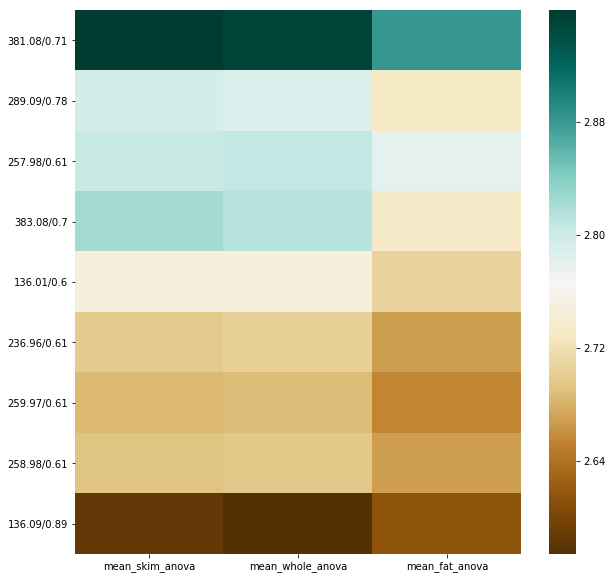

In [56]:
seaborn.heatmap(np.log(np.log(selected_data[samples].as_matrix())), xticklabels = samples, yticklabels = selected_peaks, cmap = 'BrBG')

#### PCA

In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [104]:
data_pca = pd.read_csv('../results/R_outputs/pos_100_withbg_ready.csv')

In [105]:
data_pca.head()

,row_ID,row_m_z,row_retention_time,flag_fat_threshold_005,flag_skim_threshold_005,flag_whole_threshold_005,flag_fat_threshold_100,flag_skim_threshold_100,flag_whole_threshold_100,flag_fat_threshold_200,flag_skim_threshold_200,flag_whole_threshold_200,row_ID_anova,f_value_anova,p_value_f_anova,mean_fat_anova,mean_skim_anova,mean_whole_anova,sd_fat_anova,sd_skim_anova,sd_whole_anova,mean_skim_fat_anova,mean_whole_skim_anova,mean_whole_fat_anova,p_value_skim_fat_anova,p_value_whole_skim_anova,p_value_whole_fat_anova,flag_skim_fat_anova,flag_whole_skim_anova,flag_whole_fat_anova,row_ID_kruskalwallis,k_value_kruskalwallis,p_value_k_kruskalwallis,mean_fat_kruskalwallis,mean_skim_kruskalwallis,mean_whole_kruskalwallis,sd_fat_kruskalwallis,sd_skim_kruskalwallis,sd_whole_kruskalwallis,mean_skim_fat_kruskalwallis,mean_whole_skim_kruskalwallis,mean_whole_fat_kruskalwallis,p_value_skim_fat_kruskalwallis,p_value_whole_skim_kruskalwallis,p_value_whole_fat_kruskalwallis,flag_skim_fat_kruskalwallis,flag_whole_skim_kruskalwallis,flag_whole_fat_kruskalwallis,row_identity,row_number_of_detected_peaks,row_comment,X1_Blank_p_mzXML_Peak_height,X2_Blank_p_mzXML_Peak_height,X3_Blank_p_mzXML_Peak_height,X4_Blank_p_mzXML_Peak_height,X1_extBlank_p_mzXML_Peak_height,X2_extBlank_p_mzXML_Peak_height,X3_extBlank_p_mzXML_Peak_height,X4_extBlank_p_mzXML_Peak_height,X1_NeatQC_p_mzXML_Peak_height,X2_NeatQC_p_mzXML_Peak_height,X1_BLS001A_p_mzXML_Peak_height,X10_BLS010A_p_mzXML_Peak_height,X11_BLS010A_p_mzXML_Peak_height,X12_BLS010A_p_mzXML_Peak_height,X2_BLS001A_p_mzXML_Peak_height,X4_BLS002A_p_mzXML_Peak_height,X7_BLS003A_p_mzXML_Peak_height,X3_BLS001A_p_mzXML_Peak_height,X5_BLS002A_p_mzXML_Peak_height,X8_BLS003A_p_mzXML_Peak_height,X9_BLS003A_p_mzXML_Peak_height,X6_BLS002A_p_mzXML_Peak_height,X1_BLS001A_p_dd_mzXML_Peak_height,X2_BLS001A_p_dd_mzXML_Peak_height,X3_BLS001A_p_dd_mzXML_Peak_height
0,rowID_2001,184.073304,0.713952,0,0,0,0,0,0,0,0,0,rowID_2001,1.827370,0.215750,7.709875e+08,1.199156e+09,1.140515e+09,4.408369e+08,2.803913e+08,2.844379e+08,4.281688e+08,-5.864132e+07,3.695275e+08,0.235703,0.968480,0.326522,0,0,0,rowID_2001,3.038462,0.218880,7.709875e+08,1.199156e+09,1.140515e+09,4.408369e+08,2.803913e+08,2.844379e+08,4.281688e+08,-5.864132e+07,3.695275e+08,0.148915,0.563703,0.148915,0.0,0,0,"""PHOSPHOCHOLINE""",19,NaN,0.000000,3500.083496,4104.730957,12699.591797,5.802196e+05,5.788442e+05,4.835202e+05,532068.125000,0.000000,0.000000,7.172997e+08,1.407830e+09,1.506514e+09,1.473457e+09,1.317603e+09,5.269804e+08,4.318398e+08,1.259925e+09,8.507828e+08,1.121725e+09,1.001787e+09,8.268911e+08,6.933952e+08,1.423403e+09,1.215474e+09
1,rowID_2073,258.109966,0.752392,0,0,0,0,0,0,0,0,0,rowID_2073,4.073922,0.054973,4.699996e+08,7.404280e+08,6.884758e+08,2.228849e+08,6.253935e+07,8.409115e+07,2.704284e+08,-5.195217e+07,2.184762e+08,0.058660,0.865251,0.129789,0,0,0,rowID_2073,3.230769,0.198814,4.699996e+08,7.404280e+08,6.884758e+08,2.228849e+08,6.253935e+07,8.409115e+07,2.704284e+08,-5.195217e+07,2.184762e+08,0.148915,0.386476,0.148915,0.0,0,0,"""Glycerophosphocholine""",21,NaN,0.000000,0.000000,0.000000,49284.863281,2.980863e+05,2.870476e+05,2.951326e+05,234528.642411,0.000000,13393.020508,4.594217e+08,7.791556e+08,8.114799e+08,7.837624e+08,7.673914e+08,3.869271e+08,2.544940e+08,7.242310e+08,6.673932e+08,7.154476e+08,5.892650e+08,6.566450e+08,4.615707e+08,7.829765e+08,7.428708e+08
2,rowID_1949,162.112494,0.956648,0,0,0,0,0,0,0,0,0,rowID_1949,6.053851,0.021583,4.455230e+08,8.515311e+08,8.154112e+08,2.568111e+08,1.166711e+08,1.432682e+08,4.060081e+08,-3.611987e+07,3.698882e+08,0.028913,0.958003,0.044698,1,0,1,rowID_1949,5.692308,0.058067,4.455230e+08,8.515311e+08,8.154112e+08,2.568111e+08,1.166711e+08,1.432682e+08,4.060081e+08,-3.611987e+07,3.698882e+08,0.043308,0.772830,0.043308,1.0,0,1,"""L-CARNITINE""",21,NaN,57293.347656,41408.683594,30216.771484,84147.765625,1.110350e+06,1.067313e+06,1.023817e+06,863601.498214,29807.109375,53407.593750,4.691478e+08,7.961944e+08,8.

In [106]:
len(data_pca)

812

In [107]:
fat_names = ["X10_BLS010A_p_mzXML_Peak_height", "X4_BLS002A_p_mzXML_Peak_height", "X1_BLS001A_p_mzXML_Peak_height", "X7_BLS003A_p_mzXML_Peak_height"]
whole_names = ["X12_BLS010A_p_mzXML_Peak_height", "X6_BLS002A_p_mzXML_Peak_height", "X3_BLS001A_p_mzXML_Peak_height", "X9_BLS003A_p_mzXML_Peak_height"]
skim_names = ["X11_BLS010A_p_mzXML_Peak_height", "X5_BLS002A_p_mzXML_Peak_height", "X2_BLS001A_p_mzXML_Peak_height", "X8_BLS003A_p_mzXML_Peak_height"]

In [108]:
milk_data = data_pca[fat_names + whole_names + skim_names]

In [10]:
milk_data[fat_names].head()

,X10_BLS010A_p_mzXML_Peak_height,X4_BLS002A_p_mzXML_Peak_height,X1_BLS001A_p_mzXML_Peak_height,X7_BLS003A_p_mzXML_Peak_height
0,1.407830e+09,5.269804e+08,7.172997e+08,4.318398e+08
1,7.791556e+08,3.869271e+08,4.594217e+08,2.544940e+08
2,7.961944e+08,3.046261e+08,4.691478e+08,2.121236e+08
3,8.456591e+07,6.879737e+07,7.869766e+07,0.000000e+00
4,8.444182e+07,6.864606e+07,7.661319e+07,5.289199e+07


In [11]:
milk_data[whole_names].head()

,X12_BLS010A_p_mzXML_Peak_height,X6_BLS002A_p_mzXML_Peak_height,X3_BLS001A_p_mzXML_Peak_height,X9_BLS003A_p_mzXML_Peak_height
0,1.473457e+09,8.268911e+08,1.259925e+09,1.001787e+09
1,7.837624e+08,6.566450e+08,7.242310e+08,5.892650e+08
2,8.829336e+08,8.225401e+08,9.426773e+08,6.134939e+08
3,1.075522e+08,1.374633e+08,1.238713e+08,1.203465e+08
4,1.031920e+08,1.191848e+08,1.145378e+08,1.044823e+08


In [12]:
milk_data[skim_names].head()

,X11_BLS010A_p_mzXML_Peak_height,X5_BLS002A_p_mzXML_Peak_height,X2_BLS001A_p_mzXML_Peak_height,X8_BLS003A_p_mzXML_Peak_height
0,1.506514e+09,8.507828e+08,1.317603e+09,1.121725e+09
1,8.114799e+08,6.673932e+08,7.673914e+08,7.154476e+08
2,8.994626e+08,7.963888e+08,9.883137e+08,7.219592e+08
3,9.363446e+07,1.388494e+08,1.159167e+08,1.110957e+08
4,9.511251e+07,1.209267e+08,1.037598e+08,9.832158e+07


In [131]:
# Plot PCA with confidence ellipse

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`
    
    See how and why this works: https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html
    
    This function has made it into the matplotlib examples collection:
    https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py
    
    Or, once matplotlib 3.1 has been released:
    https://matplotlib.org/gallery/index.html#statistics
    
    I update this gist according to the version there, because thanks to the matplotlib community
    the code has improved quite a bit.
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
#    return ellipse
    return ax.add_patch(ellipse)

In [109]:
x = milk_data.as_matrix().T

In [110]:
x = StandardScaler().fit_transform(x)

In [134]:
x.shape

(12, 812)

In [135]:
pca = PCA(n_components=min(x.shape))

In [136]:
principalComponents = pca.fit_transform(x)

In [137]:
pca.n_components_

12

In [140]:
columns_components = []
for i in range(pca.n_components_):
    columns_components.append('principal component ' + str(i+1))

In [141]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns_components)

In [142]:
milk_data.T.iloc[0:4]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811
X10_BLS010A_p_mzXML_Peak_height,1.407830e+09,7.791556e+08,7.961944e+08,8.456591e+07,1.405031e+08,2.592617e+08,8.176447e+07,5.431791e+08,1.495613e+08,3.483071e+08,2.019063e+08,3.861139e+08,5.178139e+08,57565212.0,6.575176e+07,4.046133e+08,9.616956e+07,1.252488e+08,8.694941e+07,1.753147e+08,7.662695e+07,1.509712e+08,1.771079e+08,9.276862e+07,2.096945e+08,1.328464e+08,1.094879e+08,7.922209e+07,3.247804e+07,24381492.00,1.133181e+08,0.0,3.589150e+07,6.213576e+07,3.773779e+07,1.453302e+07,3.613457e+07,25110574.0,9.594329e+07,3.142416e+07,4.763001e+07,3.393734e+07,5.110916e+07,1.373084e+08,6.043111e+07,9.211967e+07,4.535813e+07,5.774957e+07,2.962753e+07,6.130751e+07,5.136827e+07,3.662926e+07,1.842985e+07,3.173394e+07,3.995473e+07,1.383815e+08,4.608004e+07,4.487333e+07,4.071334e+07,2.066774e+07,6.749456e+07,4.551778e+07,1.113075e+05,2.623459e+07,1.565947e+07,2.903930e+07,2.385184e+07,4.183596e+07,2.412559e+07,5.548619e+07,2.236255e+07,9.553212e+07,1.990691e+07,26566568.0,1.197685e+07,1.794198e+07,1.630307e+07,1.805846e+07,1.049929e+07,2.354512e+07,9.977346e+06,3.071643e+07,1.561728e+07,5.564918e+06,7.619602e+07,2.451696e+07,1.820646e+07,9.549149e+06,4.909187e+07,9.824538e+06,2.507805e+07,6.069462e+06,2.548283e+07,1.143674e+07,5.854789e+07,0.0,2.052749e+07,7.968821e+06,9.142766e+06,2.383605e+07,2.058017e+07,6098078.00,3.893488e+06,5.928263e+06,1.401210e+07,1.059532e+07,4.789655e+07,1.207295e+07,8.401872e+06,20420436.0,1.813570e+07,1.112923e+07,4.180830e+07,1.967537e+07,5.356832e+06,1.740970e+07,1.301125e+07,1.134604e+07,1.344240e+07,2.015966e+07,1.575664e+07,1.330757e+07,1.886074e+07,5.870060e+07,3.233373e+07,1.690105e+07,1.410596e+05,1.112256e+07,13069304.00,1.053818e+07,5.451212e+06,4.167482e+06,7.096340e+06,1.071711e+07,4730917.500,6.185664e+06,14077137.00,1.730813e+07,2.347240e+08,2.143696e+06,4982619.5,1.819160e+07,8.061066e+06,8.432104e+06,4.994911e+06,7.129287e+06,6.649360e+06,6.159783e+06,4.054603e+07,3.177332e+07,1.685926e+06,1.438552e+07,3.318005e+06,1.796820e+07,14541301.0,1.212165e+07,16369874.0,1.281108e+07,6.734357e+06,7.556570e+06,2.606659e+06,6.154746e+06,3.7704

In [143]:
target_data = {"label": ["fat"] * 4 + ["whole"] * 4 + ["skim"] * 4}

In [144]:
target_df = pd.DataFrame(target_data)

In [145]:
list(set(target_df.values.flatten()))

['skim', 'whole', 'fat']

In [146]:
final_df = pd.concat([principalDf, target_df.label], axis = 1)

In [147]:
final_df

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,label
0,-7.143242,-11.340207,-12.715344,4.989650,-2.702967,-8.036372,-2.313776,8.525399,-1.777407,-0.540389,-2.810323,6.820536e-15,fat
1,30.395157,-3.005183,0.671553,-7.057672,-12.246358,-5.281226,-6.474596,-4.551884,1.630441,1.147501,0.219429,6.820536e-15,fat
2,23.303151,0.581258,5.164844,13.014478,-9.726620,6.675417,8.076956,2.142628,-1.531870,-0.783484,0.054692,6.820536e-15,fat
3,35.247094,1.517653,-5.809451,-0.079717,18.104426,-0.215234,-0.656074,0.065976,-1.556337,-1.203925,0.325077,6.820536e-15,fat
4,-11.209841,-18.003467,-12.382743,-9.294078,-0.742206,11.457916,-1.997131,-1.487097,-3.309670,2.237827,-0.045607,6.820536e-15,whole
5,-7.687582,-0.966727,14.347320,-11.503617,-0.079435,-3.540480,2.488001,4.605417,-2.255322,-0.145564,5.786372,6.820536e-15,whole
6,-10.937660,-0.138645,14.295826,3.546919,0.984331,5.333508,-7.380979,0.779557,2.870454,-7.274107,-0.763933,6.820536e-15,whole
7,-3.305368,20.804646,-10.441169,-5.232190,-0.058389,3.843182,0.667917,4.175690,7.374864,3.187897,0.021624,6.820536e-15,whole
8,-14.487688,-14.216871,-11.470852,6.648241,1.900844,-4.562094,5.510365,-5.746437,4.798763,-2.272928,2.498382,6.820536e-15,skim
9,-6.423998,-1.847348,15.077340,-10.851169,2.842716,-2.642813,6.647300,-2.374965,0.376609,0.658740,-5.621671,6.820536e-15,skim


In [148]:
x_fat = final_df[final_df.label == "fat"]["principal component 1"].as_matrix()
y_fat = final_df[final_df.label == "fat"]["principal component 2"].as_matrix()
x_whole = final_df[final_df.label == "whole"]["principal component 1"].as_matrix()
y_whole = final_df[final_df.label == "whole"]["principal component 2"].as_matrix()
x_skim = final_df[final_df.label == "skim"]["principal component 1"].as_matrix()
y_skim = final_df[final_df.label == "skim"]["principal component 2"].as_matrix()

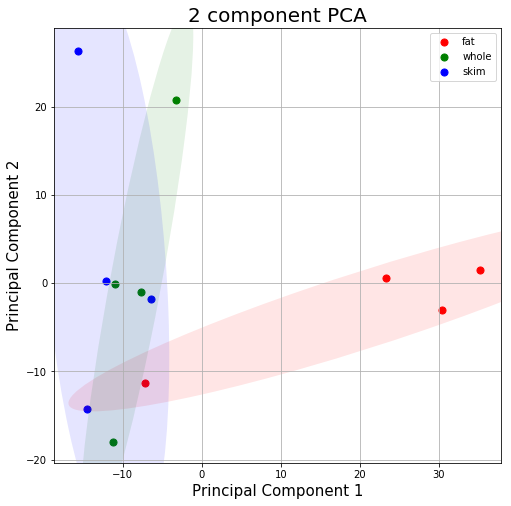

In [149]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['fat', 'whole', 'skim']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['label'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
# ax.set_xlim(-50, 50)
# ax.set_ylim(-50, 50)
confidence_ellipse(x_fat, y_fat, ax, n_std = 1.96, facecolor = "r", alpha = 0.1)
confidence_ellipse(x_whole, y_whole, ax, n_std = 1.96, facecolor = "g", alpha = 0.1)
confidence_ellipse(x_skim, y_skim, ax, n_std = 1.96, facecolor = "b", alpha = 0.1)
# plt.show()
# plt.show()
# plt.savefig("pca.png")

In [150]:
pca.explained_variance_ratio_

array([3.81606653e-01, 1.84448935e-01, 1.57348965e-01, 9.05545884e-02,
       6.35591545e-02, 3.66681393e-02, 2.78609232e-02, 2.05187584e-02,
       1.52595277e-02, 1.39474492e-02, 8.22690649e-03, 5.72902792e-32])

In [ ]:
n_std=3.0
cov = np.cov(x_fat, y_fat)
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
# Using a special case to obtain the eigenvalues of this
# two-dimensionl dataset.
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
ellipse = Ellipse((0, 0),
    width=ell_radius_x * 2,
    height=ell_radius_y * 2,
    facecolor="r", alpha = 0.2)

# Calculating the stdandard deviation of x from
# the squareroot of the variance and multiplying
# with the given number of standard deviations.
scale_x = np.sqrt(cov[0, 0]) * n_std
mean_x = np.mean(x_fat)

# calculating the stdandard deviation of y ...
scale_y = np.sqrt(cov[1, 1]) * n_std
mean_y = np.mean(y_fat)

transf = transforms.Affine2D() \
    .rotate_deg(45) \
    .scale(scale_x, scale_y) \
    .translate(mean_x, mean_y)

ellipse.set_transform(transf + ax.transData)
ax.add_patch(ellipse)

#### Hierachical Clustering

In [45]:
import seaborn as sns; sns.set(color_codes=True)

In [46]:
data.head()

,row_ID,row_m_z,row_retention_time,flag_fat_threshold_005,flag_skim_threshold_005,flag_whole_threshold_005,flag_fat_threshold_100,flag_skim_threshold_100,flag_whole_threshold_100,flag_fat_threshold_200,flag_skim_threshold_200,flag_whole_threshold_200,row_ID_anova,f_value_anova,p_value_f_anova,mean_fat_anova,mean_skim_anova,mean_whole_anova,sd_fat_anova,sd_skim_anova,sd_whole_anova,mean_skim_fat_anova,mean_whole_skim_anova,mean_whole_fat_anova,p_value_skim_fat_anova,p_value_whole_skim_anova,p_value_whole_fat_anova,flag_skim_fat_anova,flag_whole_skim_anova,flag_whole_fat_anova,row_ID_kruskalwallis,k_value_kruskalwallis,p_value_k_kruskalwallis,mean_fat_kruskalwallis,mean_skim_kruskalwallis,mean_whole_kruskalwallis,sd_fat_kruskalwallis,sd_skim_kruskalwallis,sd_whole_kruskalwallis,mean_skim_fat_kruskalwallis,mean_whole_skim_kruskalwallis,mean_whole_fat_kruskalwallis,p_value_skim_fat_kruskalwallis,p_value_whole_skim_kruskalwallis,p_value_whole_fat_kruskalwallis,flag_skim_fat_kruskalwallis,flag_whole_skim_kruskalwallis,flag_whole_fat_kruskalwallis,row_identity,row_number_of_detected_peaks,row_comment,X1_Blank_p_mzXML_Peak_height,X2_Blank_p_mzXML_Peak_height,X3_Blank_p_mzXML_Peak_height,X4_Blank_p_mzXML_Peak_height,X1_extBlank_p_mzXML_Peak_height,X2_extBlank_p_mzXML_Peak_height,X3_extBlank_p_mzXML_Peak_height,X4_extBlank_p_mzXML_Peak_height,X1_NeatQC_p_mzXML_Peak_height,X2_NeatQC_p_mzXML_Peak_height,X1_BLS001A_p_mzXML_Peak_height,X10_BLS010A_p_mzXML_Peak_height,X11_BLS010A_p_mzXML_Peak_height,X12_BLS010A_p_mzXML_Peak_height,X2_BLS001A_p_mzXML_Peak_height,X4_BLS002A_p_mzXML_Peak_height,X7_BLS003A_p_mzXML_Peak_height,X3_BLS001A_p_mzXML_Peak_height,X5_BLS002A_p_mzXML_Peak_height,X8_BLS003A_p_mzXML_Peak_height,X9_BLS003A_p_mzXML_Peak_height,X6_BLS002A_p_mzXML_Peak_height,X1_BLS001A_p_dd_mzXML_Peak_height,X2_BLS001A_p_dd_mzXML_Peak_height,X3_BLS001A_p_dd_mzXML_Peak_height,label,foldchange_whole_skim,foldchange_whole_fat,foldchange_skim_fat,logfoldchange_whole_skim,logfoldchange_whole_fat,logfoldchange_skim_fat,logpvalue_whole_fat,logpvalue_whole_skim,logpvalue_skim_fat
0,rowID_2361,184.073304,0.713952,0,0,0,0,0,0,0,0,0,rowID_2361,1.827370,0.215750,7.709875e+08,1.199156e+09,1.140515e+09,4.408369e+08,2.803913e+08,2.844379e+08,4.281688e+08,-5.864132e+07,3.695275e+08,0.235703,0.968480,0.326522,0,0,0,rowID_2361,3.038462,0.218880,7.709875e+08,1.199156e+09,1.140515e+09,4.408369e+08,2.803913e+08,2.844379e+08,4.281688e+08,-5.864132e+07,3.695275e+08,0.148915,0.563703,0.148915,0.0,0,0,"""PHOSPHOCHOLINE""",19,NaN,0.000000,3500.083496,4104.730957,12699.591797,5.802196e+05,5.788442e+05,4.835202e+05,532068.125000,0.000000,0.000000,7.172997e+08,1.407830e+09,1.506514e+09,1.473457e+09,1.317603e+09,5.269804e+08,4.318398e+08,1.259925e+09,8.507828e+08,1.121725e+09,1.001787e+09,8.268911e+08,6.933952e+08,1.423403e+09,1.215474e+09,"""PHOSPHOCHOLINE""",-1.051417,1.479291,1.555351,-0.072334,0.564906,0.637240,0.486087,0.013909,0.627636
1,rowID_1581,258.109966,0.752392,0,0,0,0,0,0,0,0,0,rowID_1581,4.073922,0.054973,4.699996e+08,7.404280e+08,6.884758e+08,2.228849e+08,6.253935e+07,8.409115e+07,2.704284e+08,-5.195217e+07,2.184762e+08,0.058660,0.865251,0.129789,0,0,0,rowID_1581,3.230769,0.198814,4.699996e+08,7.404280e+08,6.884758e+08,2.228849e+08,6.253935e+07,8.409115e+07,2.704284e+08,-5.195217e+07,2.184762e+08,0.148915,0.386476,0.148915,0.0,0,0,"""Glycerophosphocholine""",21,NaN,0.000000,0.000000,0.000000,49284.863281,2.980863e+05,2.870476e+05,2.951326e+05,234528.642411,0.000000,13393.020508,4.594217e+08,7.791556e+08,8.114799e+08,7.837624e+08,7.673914e+08,3.869271e+08,2.544940e+08,7.242310e+08,6.673932e+08,7.154476e+08,5.892650e+08,6.566450e+08,4.615707e+08,7.829765e+08,7.428708e+08,"""Glycerophosphocholine""",-1.075460,1.464843,1.575380,-0.104953,0.550746,0.655700,0.886763,0.062858,1.231662
2,rowID_1453,162.112494,0.956648,0,0,0,0,0,0,0,0,0,rowID_1453,6.053851,0.021583,4.455230e+08,8.515311e+08,8.154112e+08,2.568111e+08,1.166711e+08,1.432682e+08,4.060081e+08,-3.611987e

In [47]:
new_index = []
for i in range(len(data)):
    if data.iloc[i].row_identity == '""':
        new_index.append(data.iloc[i].label)
    else:
        new_index.append(data.iloc[i].row_identity)

In [48]:
new_index_filtered = [new_index[i] for i in fat.index]

In [49]:
milk_data = data[fat_names + whole_names + skim_names]

In [50]:
milk_data_fat_filtered = milk_data.iloc[fat.index]

In [51]:
milk_data_skim_filtered = milk_data.iloc[skim.index]

In [52]:
len(milk_data_skim_filtered)

0

In [53]:
milk_data_fat_filtered.index = new_index_filtered

In [54]:
for i, fat_name in enumerate(fat_names):
    milk_data_fat_filtered.rename(columns = {fat_name: 'fat_' + str(i)}, inplace = True)
for i, whole_name in enumerate(whole_names):
    milk_data_fat_filtered.rename(columns = {whole_name: 'whole_' + str(i)}, inplace = True)
for i, skim_name in enumerate(skim_names):
    milk_data_fat_filtered.rename(columns = {skim_name: 'skim_' + str(i)}, inplace = True)

In [55]:
milk_data_fat_filtered.head()

,fat_0,fat_1,fat_2,fat_3,whole_0,whole_1,whole_2,whole_3,skim_0,skim_1,skim_2,skim_3
"""Citrate+NH3""",2.592617e+08,1.181538e+08,2.104484e+08,9.677833e+07,3.634762e+08,4.252473e+08,4.075513e+08,3.356351e+08,2.854111e+08,4.771971e+08,3.689592e+08,3.363871e+08
"""Citrate source fragment (+NH3)""",9.616956e+07,3.444308e+07,7.269039e+07,2.762833e+07,1.040099e+08,1.353423e+08,1.469544e+08,1.119311e+08,1.049329e+08,1.426665e+08,1.485813e+08,1.327541e+08
"""CITRATE""",8.694941e+07,3.893706e+07,7.101061e+07,3.132052e+07,1.197383e+08,1.423229e+08,1.377446e+08,1.107290e+08,9.745422e+07,1.543222e+08,1.267444e+08,1.151503e+08
147.03/1.85,7.662695e+07,2.496222e+07,5.718253e+07,2.027827e+07,7.316368e+07,9.841136e+07,1.135977e+08,8.407570e+07,8.487767e+07,9.742713e+07,1.245572e+08,1.088459e+08
"""Citrate source fragment (+NH3)""",3.613457e+07,1.055140e+07,2.587853e+07,8.266259e+06,3.143076e+07,4.313498e+07,5.358689e+07,3.945142e+07,3.995393e+07,4.268352e+07,6.016665e+07,5.328516e+07


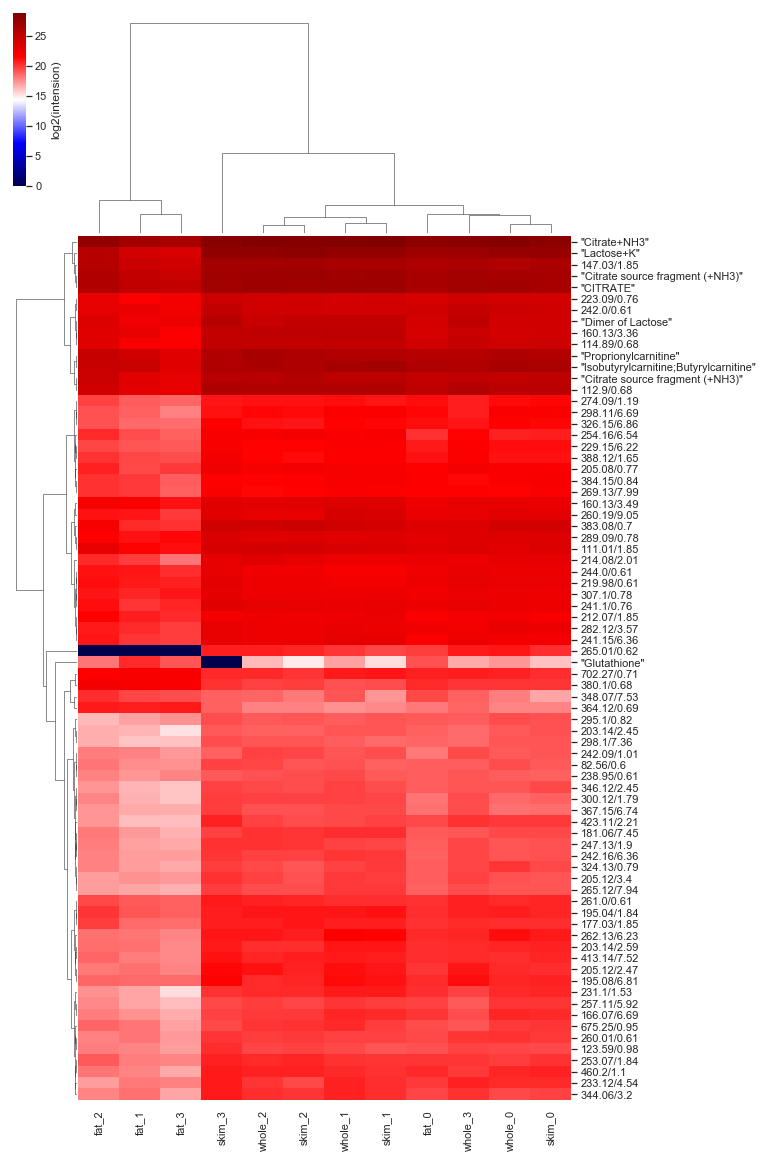

In [135]:
g = sns.clustermap(np.log2(milk_data_fat_filtered + 1), figsize = (10, 20), xticklabels=True, yticklabels=True, cmap = "seismic", cbar_kws={'label': 'log2(intension)'}, method = 'ward')

In [58]:
len(milk_data_fat_filtered)

76

#### skim

Text(0.5,1,'Log2 Mean Fold Change (Threshold is skim)')

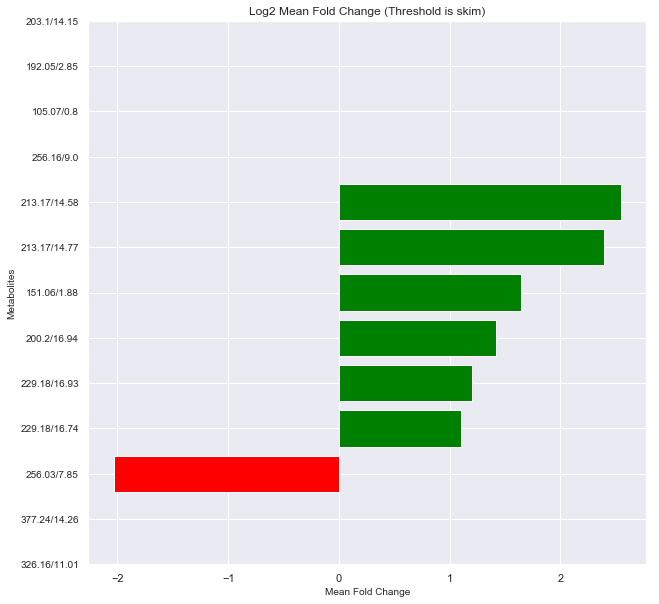

In [103]:
skim["mean_foldchange_skim"] = data.apply(lambda row: mean_fold_change(row, 'logfoldchange_skim_fat', 'logfoldchange_whole_skim', 'p', 'n'), axis = 1)
skim_fold_change_sorted = skim.sort_values(by=["mean_foldchange_skim"])
n_pos = min(10, len(skim[skim.mean_foldchange_skim>=0]))
n_neg = min(10, len(skim[skim.mean_foldchange_skim<0]))
names_skim = skim_fold_change_sorted.label[0:n_pos].tolist() + skim_fold_change_sorted.label[-n_neg:].tolist()
values = skim_fold_change_sorted.mean_foldchange_skim[0:n_pos].tolist() + skim_fold_change_sorted.mean_foldchange_skim[-n_neg:].tolist()

index = np.arange(len(names_skim))
plt.barh(names_skim, values, color = ["red"] * n_neg + ["green"] * n_pos)
plt.xlabel('Mean Fold Change', fontsize=10)
plt.ylabel('Metabolites', fontsize=10)
plt.yticks(index, names_skim, fontsize=10)
plt.title('Log2 Mean Fold Change (Threshold is skim)')

In [104]:
n_pos

10

In [105]:
n_neg

3

In [107]:
names_skim

['326.16/11.01',
 '377.24/14.26',
 '256.03/7.85',
 '229.18/16.74',
 '229.18/16.93',
 '200.2/16.94',
 '151.06/1.88',
 '213.17/14.77',
 '213.17/14.58',
 '256.16/9.0',
 '105.07/0.8',
 '192.05/2.85',
 '203.1/14.15']

In [106]:
values

[-inf,
 -inf,
 -2.0324292925429406,
 1.100550447939277,
 1.2056768137081784,
 1.4170760898027557,
 1.6400801078002512,
 2.391005621624359,
 2.5478387611191007,
 inf,
 inf,
 inf,
 inf]

In [108]:
skim[skim.label == "203.1/14.15"]

,row_ID,row_m_z,row_retention_time,flag_fat_threshold_005,flag_skim_threshold_005,flag_whole_threshold_005,flag_fat_threshold_100,flag_skim_threshold_100,flag_whole_threshold_100,flag_fat_threshold_200,flag_skim_threshold_200,flag_whole_threshold_200,row_ID_anova,f_value_anova,p_value_f_anova,mean_fat_anova,mean_skim_anova,mean_whole_anova,sd_fat_anova,sd_skim_anova,sd_whole_anova,mean_skim_fat_anova,mean_whole_skim_anova,mean_whole_fat_anova,p_value_skim_fat_anova,p_value_whole_skim_anova,p_value_whole_fat_anova,flag_skim_fat_anova,flag_whole_skim_anova,flag_whole_fat_anova,row_ID_kruskalwallis,k_value_kruskalwallis,p_value_k_kruskalwallis,mean_fat_kruskalwallis,mean_skim_kruskalwallis,mean_whole_kruskalwallis,sd_fat_kruskalwallis,sd_skim_kruskalwallis,sd_whole_kruskalwallis,mean_skim_fat_kruskalwallis,mean_whole_skim_kruskalwallis,mean_whole_fat_kruskalwallis,p_value_skim_fat_kruskalwallis,p_value_whole_skim_kruskalwallis,p_value_whole_fat_kruskalwallis,flag_skim_fat_kruskalwallis,flag_whole_skim_kruskalwallis,flag_whole_fat_kruskalwallis,row_identity,row_number_of_detected_peaks,row_comment,X1_Blank_p_mzXML_Peak_height,X2_Blank_p_mzXML_Peak_height,X3_Blank_p_mzXML_Peak_height,X4_Blank_p_mzXML_Peak_height,X1_extBlank_p_mzXML_Peak_height,X2_extBlank_p_mzXML_Peak_height,X3_extBlank_p_mzXML_Peak_height,X4_extBlank_p_mzXML_Peak_height,X1_NeatQC_p_mzXML_Peak_height,X2_NeatQC_p_mzXML_Peak_height,X1_BLS001A_p_mzXML_Peak_height,X10_BLS010A_p_mzXML_Peak_height,X11_BLS010A_p_mzXML_Peak_height,X12_BLS010A_p_mzXML_Peak_height,X2_BLS001A_p_mzXML_Peak_height,X4_BLS002A_p_mzXML_Peak_height,X7_BLS003A_p_mzXML_Peak_height,X3_BLS001A_p_mzXML_Peak_height,X5_BLS002A_p_mzXML_Peak_height,X8_BLS003A_p_mzXML_Peak_height,X9_BLS003A_p_mzXML_Peak_height,X6_BLS002A_p_mzXML_Peak_height,X1_BLS001A_p_dd_mzXML_Peak_height,X2_BLS001A_p_dd_mzXML_Peak_height,X3_BLS001A_p_dd_mzXML_Peak_height,label,foldchange_whole_skim,foldchange_whole_fat,foldchange_skim_fat,logfoldchange_whole_skim,logfoldchange_whole_fat,logfoldchange_skim_fat,logpvalue_whole_fat,logpvalue_whole_skim,logpvalue_skim_fat,mean_foldchange_skim
12415,rowID_8207,203.103154,14.152582,1,1,1,1,1,1,1,1,1,rowID_8207,8.495637,0.00846,1161.760986,54557.969029,0.0,2323.521973,36970.975754,0.0,53396.208043,-54557.969029,-1161.760986,0.015917,0.01416,0.996753,1.0,1.0,0.0,rowID_8207,5.67698,0.058514,1161.760986,54557.969029,0.0,2323.521973,36970.975754,0.0,53396.208043,-54557.969029,-1161.760986,0.090724,0.047221,0.317311,0.0,1.0,0.0,"""""",3,NaN,32754.148438,18715.777344,3196.602539,0.0,0.0,0.0,3665.025879,0.0,2900.875977,0.0,0.0,0.0,79572.716071,0.0,0.0,0.0,4647.043945,0.0,63768.617522,74890.542522,0.0,0.0,0.0,0.0,0.0,203.1/14.15,-inf,-inf,46.96144,-inf,-inf,5.553405,0.001412,1.84895,1.798132,inf


#### Bar plot

In [56]:
fat.head()

,row_ID,row_m_z,row_retention_time,flag_fat_threshold_005,flag_skim_threshold_005,flag_whole_threshold_005,flag_fat_threshold_100,flag_skim_threshold_100,flag_whole_threshold_100,flag_fat_threshold_200,flag_skim_threshold_200,flag_whole_threshold_200,row_ID_anova,f_value_anova,p_value_f_anova,mean_fat_anova,mean_skim_anova,mean_whole_anova,sd_fat_anova,sd_skim_anova,sd_whole_anova,mean_skim_fat_anova,mean_whole_skim_anova,mean_whole_fat_anova,p_value_skim_fat_anova,p_value_whole_skim_anova,p_value_whole_fat_anova,flag_skim_fat_anova,flag_whole_skim_anova,flag_whole_fat_anova,row_ID_kruskalwallis,k_value_kruskalwallis,p_value_k_kruskalwallis,mean_fat_kruskalwallis,mean_skim_kruskalwallis,mean_whole_kruskalwallis,sd_fat_kruskalwallis,sd_skim_kruskalwallis,sd_whole_kruskalwallis,mean_skim_fat_kruskalwallis,mean_whole_skim_kruskalwallis,mean_whole_fat_kruskalwallis,p_value_skim_fat_kruskalwallis,p_value_whole_skim_kruskalwallis,p_value_whole_fat_kruskalwallis,flag_skim_fat_kruskalwallis,flag_whole_skim_kruskalwallis,flag_whole_fat_kruskalwallis,row_identity,row_number_of_detected_peaks,row_comment,X1_Blank_p_mzXML_Peak_height,X2_Blank_p_mzXML_Peak_height,X3_Blank_p_mzXML_Peak_height,X4_Blank_p_mzXML_Peak_height,X1_extBlank_p_mzXML_Peak_height,X2_extBlank_p_mzXML_Peak_height,X3_extBlank_p_mzXML_Peak_height,X4_extBlank_p_mzXML_Peak_height,X1_NeatQC_p_mzXML_Peak_height,X2_NeatQC_p_mzXML_Peak_height,X1_BLS001A_p_mzXML_Peak_height,X10_BLS010A_p_mzXML_Peak_height,X11_BLS010A_p_mzXML_Peak_height,X12_BLS010A_p_mzXML_Peak_height,X2_BLS001A_p_mzXML_Peak_height,X4_BLS002A_p_mzXML_Peak_height,X7_BLS003A_p_mzXML_Peak_height,X3_BLS001A_p_mzXML_Peak_height,X5_BLS002A_p_mzXML_Peak_height,X8_BLS003A_p_mzXML_Peak_height,X9_BLS003A_p_mzXML_Peak_height,X6_BLS002A_p_mzXML_Peak_height,X1_BLS001A_p_dd_mzXML_Peak_height,X2_BLS001A_p_dd_mzXML_Peak_height,X3_BLS001A_p_dd_mzXML_Peak_height,label,foldchange_whole_skim,foldchange_whole_fat,foldchange_skim_fat,logfoldchange_whole_skim,logfoldchange_whole_fat,logfoldchange_skim_fat,logpvalue_whole_fat,logpvalue_whole_skim,logpvalue_skim_fat
5,rowID_1588,210.060888,1.843373,0,0,0,0,0,0,0,0,0,rowID_1588,11.811581,0.003042,1.711605e+08,3.669886e+08,3.829775e+08,7.669804e+07,8.111953e+07,4.087466e+07,1.958281e+08,1.598888e+07,2.118170e+08,0.007468,0.942308,0.004627,1,0,1,rowID_1588,7.423077,0.024440,1.711605e+08,3.669886e+08,3.829775e+08,7.669804e+07,8.111953e+07,4.087466e+07,1.958281e+08,1.598888e+07,2.118170e+08,0.020921,0.772830,0.020921,1.0,0,1,"""Citrate+NH3""",23,NaN,2953.558838,0.0,0.0,21212.277344,260488.016518,254940.262054,254405.601786,225224.175446,1.255896e+08,9.147715e+07,2.104484e+08,2.592617e+08,2.854111e+08,3.634762e+08,3.689592e+08,1.181538e+08,9.677833e+07,4.075513e+08,4.771971e+08,3.363871e+08,3.356351e+08,4.252473e+08,1.982959e+08,3.410437e+08,3.196664e+08,"""Citrate+NH3""",1.043568,2.237534,2.144119,0.061524,1.161909,1.100385,2.334704,0.025807,2.126786
16,rowID_2605,175.023772,1.845466,0,0,0,0,0,0,0,0,0,rowID_2605,11.049122,0.003774,5.773284e+07,1.322337e+08,1.245594e+08,3.240270e+07,1.933641e+07,1.999636e+07,7.450085e+07,-7.674270e+06,6.682658e+07,0.005274,0.899848,0.010077,1,0,1,rowID_2605,7.538462,0.023070,5.773284e+07,1.322337e+08,1.245594e+08,3.240270e+07,1.933641e+07,1.999636e+07,7.450085e+07,-7.674270e+06,6.682658e+07,0.020921,0.563703,0.020921,1.0,0,1,"""Citrate source fragment (+NH3)""",19,NaN,0.000000,0.0,0.0,10385.553711,57189.578125,59177.753906,53526.886719,78487.398438,3.011491e+07,3.352336e+07,7.269039e+07,9.616956e+07,1.049329e+08,1.040099e+08,1.485813e+08,3.444308e+07,2.762833e+07,1.469544e+08,1.426665e+08,1.327541e+08,1.119311e+08,1.353423e+08,7.405688e+07,1.441101e+08,1.418303e+08,"""Citrate source fragment (+NH3)""",-1.061611,2.157514,2.290441,-0.086256,1.109370,1.195626,1.996680,0.045831,2.277891
18,rowID_2606,193.034392,1.844926,0,0,0,0,0,0,0,0,0,rowID_2606,12.668160,0.002417,5.705440e+07,1.234178e+08,1.276337e+08,2.632463e+07,2.386494e+07,1.490090e+07,6.636339e+07,4.2159

In [57]:
def mean_fold_change(row, left, right, sign_left, sign_right):
    if sign_left == sign_right == "p":
        return (row[left]+row[right])/2
    elif sign_left == sign_right == "n":
        return -(row[left]+row[right])/2
    elif sign_left == "p" and sign_right == "n":
        return (row[left] - row[right])/2
    else:
        return (-row[left] + row[right])/2

#### fat

In [58]:
fat["mean_foldchange_fat"] = data.apply(lambda row: mean_fold_change(row, 'logfoldchange_skim_fat', 'logfoldchange_whole_fat', 'n', 'n'), axis = 1)

In [59]:
fat_fold_change_sorted = fat.sort_values(by=["mean_foldchange_fat"])

In [60]:
n_pos = min(10, len(fat[fat.mean_foldchange_fat>=0]))
n_neg = min(10, len(fat[fat.mean_foldchange_fat<0]))

In [61]:
names = fat_fold_change_sorted.label[0:n_pos].tolist() + fat_fold_change_sorted.label[-n_neg:].tolist()

In [62]:
values = fat_fold_change_sorted.mean_foldchange_fat[0:n_pos].tolist() + fat_fold_change_sorted.mean_foldchange_fat[-n_neg:].tolist()

In [63]:
names

['265.01/0.62',
 '300.12/1.79',
 '383.08/0.7',
 '205.12/2.47',
 '262.13/6.23',
 '212.07/1.85',
 '195.04/1.84',
 '82.56/0.6',
 '238.95/0.61',
 '261.0/0.61',
 '702.27/0.71',
 '348.07/7.53',
 '380.1/0.68',
 '364.12/0.69',
 '"Glutathione"']

In [64]:
values

[-2.626788461585678,
 -2.0445508009023445,
 -2.0403244414572366,
 -2.0204286858846783,
 -2.0086109191329515,
 -1.1159067653965846,
 -1.1032546918186528,
 -1.0951500001482677,
 -1.0644902226961666,
 -1.0486000567299543,
 1.1274870183029377,
 1.4019401576144692,
 1.9484678338846506,
 2.373252415357204,
 3.4063513886537846]

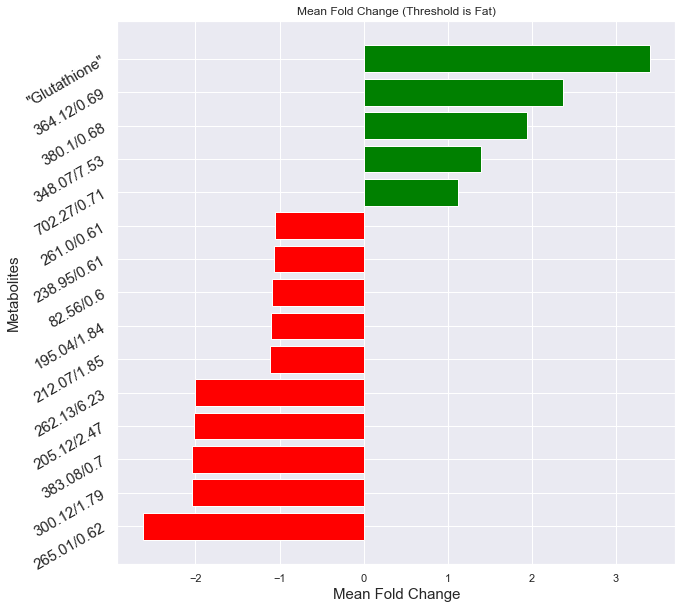

In [65]:
# this is for plotting purpose

index = np.arange(len(names))
plt.barh(names, values, color = ["red"] * n_neg + ["green"] * n_pos)
plt.xlabel('Mean Fold Change', fontsize=15)
plt.ylabel('Metabolites', fontsize=15)
plt.yticks(index, names, fontsize=15, rotation=30)
plt.title('Mean Fold Change (Threshold is Fat)')
plt.show()

#### whole

#### cloud plot

In [58]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

import os

In [59]:
init_notebook_mode(connected=True)

In [63]:
x

array([ 0.73237319,  0.76062121,  0.945414  ,  5.55326733,  1.83020556,
        0.85813833,  0.879552  ,  0.89107083,  1.85137727,  0.60580267,
        0.590258  ,  1.84945   ,  0.95258158,  1.84427063,  1.83753106,
        0.85738158, 16.06887067,  0.92281133,  5.69102   ,  0.60646667,
        0.60462067,  1.79732222,  0.75136867, 16.27457133,  0.60610417,
        7.69393   ,  7.70073933, 10.02601133,  2.53127667,  2.53548067,
        1.76267349,  0.76209035,  0.71643333, 12.50997619,  1.84448492,
        1.85845455,  6.141288  ,  2.49341667,  0.604964  ,  0.60657267,
        0.88960397, 11.46851533,  0.605604  , 11.11385867,  0.60617533,
        0.604348  ,  0.79352333,  3.48248733,  6.363122  ,  0.77772381,
        6.54653   ,  6.35840133,  1.12100614,  7.68449242,  1.04703039,
        0.60585533,  0.60585533,  0.81337632,  0.823486  ,  0.80541754,
        0.71642   ,  0.81703583, 12.50980079,  0.83039216,  6.70921733,
       11.48301364,  2.224956  ,  7.92430079,  0.80733421, 11.44

In [77]:
np.sqrt(sz)

array([ 0.82546607,  0.82918186,  0.73617227,  0.71789463,  0.66565875,
        0.7642634 ,  0.7708602 ,  0.73202635,  0.75587335,  0.76509004,
        0.92608079,  0.70056237,  0.71553529,  0.66907109,  0.67982254,
        0.81339457,  1.32796528,  0.75278325,  0.83212121,  0.9396749 ,
        0.7748414 ,  0.69664555,  0.94290072,  1.26981063,  0.7416071 ,
        1.01032719,  1.01032719,  1.02483945,  1.03171476,  0.72118234,
        0.72099709,  1.08618712,  0.5288799 ,  0.96051869,  0.73481925,
        0.69111599,  1.02031082,  1.03991496,  0.98858315,  0.79246557,
        1.32079511,  1.06092006,  0.99386025,  0.73007222,  0.79931092,
        0.7719287 ,  0.63264777,  0.54168464,  1.0110856 ,  0.64097817,
        0.8619648 ,  0.73411198,  0.82197843,  1.01776299,  0.65708845,
        0.76783733,  0.76783733,  0.87621512,  0.78939872,  0.86664297,
        1.10729716,  0.8652485 ,  0.96169563,  1.08040197,  0.70480976,
        1.05011984,  0.72748291,  0.98471421,  0.89102147,  1.04

In [66]:
np.random.rand(100)*30

array([14.41789735, 28.39823772, 15.42886868, 23.20079575, 23.60790978,
        0.84078362, 23.77975724,  8.44208367,  8.10515267, 26.20848889,
        4.30773012, 17.45958718, 17.4401687 , 11.84543272,  3.65882892,
       19.9336833 ,  0.16566982, 19.95083187, 17.90985002,  8.18520206,
       24.76587654, 27.11306468, 26.91469148, 21.93544857, 26.96542112,
       10.28964111, 14.59929589, 29.62866368,  5.14744699,  1.65500038,
       14.84259742,  5.26911005, 28.36797875,  9.64071807, 16.11884973,
       11.63003601, 12.93619106, 28.16993695, 27.65653125,  7.17038394,
       20.41782359, 27.13526753, 18.49230753, 20.87208081, 27.78504524,
        0.7670802 ,  4.97088811, 20.59343682, 22.54631123,  8.08645405,
       15.41814194, 17.19186814,  1.66595259,  1.65007154, 26.25906578,
       22.14467638,  1.3245123 , 22.24050014, 12.41004509, 21.81891669,
        5.75846688,  4.0901538 , 11.89707713, 27.88648198, 21.97975388,
       17.74609239,  0.3328732 , 15.91127457, 25.22917386, 11.61

In [74]:
1-colors

array([2.53225040e-02, 1.01187802e-01, 3.80006390e-02, 9.19176590e-02,
       8.68693910e-02, 4.91159950e-02, 2.17713810e-02, 7.65456630e-02,
       1.41835234e-01, 1.65995860e-02, 1.54157772e-01, 4.55652677e-01,
       2.66398700e-03, 4.52980030e-02, 8.53614590e-02, 3.53247780e-02,
       2.14217587e-01, 1.02577878e-01, 1.09159991e-01, 4.35249515e-01,
       1.97917574e-01, 2.70305900e-01, 6.13873500e-03, 2.76190503e-01,
       3.46311100e-03, 1.02622900e-03, 1.02622900e-03, 1.11966295e-01,
       4.33597003e-01, 6.26936410e-02, 1.81006818e-01, 6.03680000e-05,
       4.97200204e-01, 5.74556995e-01, 5.21055290e-01, 3.28201780e-01,
       3.71900567e-01, 6.91986168e-01, 4.21984540e-02, 3.21090400e-03,
       2.08457600e-02, 9.66769396e-01, 1.02798670e-02, 2.51513853e-01,
       6.50266350e-02, 2.01949760e-02, 8.68084990e-02, 5.63778990e-02,
       3.46581123e-01, 2.86942850e-01, 6.74978537e-01, 2.66765090e-02,
       7.80761490e-02, 1.38086030e-02, 3.39198400e-03, 2.83531770e-02,
      

In [95]:
sig_data = data[data['p_value_whole_fat_anova']<=0.05]

In [96]:
sig_data

,row_ID,row_m_z,row_retention_time,flag_fat_threshold_005,flag_skim_threshold_005,flag_whole_threshold_005,flag_fat_threshold_100,flag_skim_threshold_100,flag_whole_threshold_100,flag_fat_threshold_200,flag_skim_threshold_200,flag_whole_threshold_200,row_ID_anova,f_value_anova,p_value_f_anova,mean_fat_anova,mean_skim_anova,mean_whole_anova,sd_fat_anova,sd_skim_anova,sd_whole_anova,mean_skim_fat_anova,mean_whole_skim_anova,mean_whole_fat_anova,p_value_skim_fat_anova,p_value_whole_skim_anova,p_value_whole_fat_anova,flag_skim_fat_anova,flag_whole_skim_anova,flag_whole_fat_anova,row_ID_kruskalwallis,k_value_kruskalwallis,p_value_k_kruskalwallis,mean_fat_kruskalwallis,mean_skim_kruskalwallis,mean_whole_kruskalwallis,sd_fat_kruskalwallis,sd_skim_kruskalwallis,sd_whole_kruskalwallis,mean_skim_fat_kruskalwallis,mean_whole_skim_kruskalwallis,mean_whole_fat_kruskalwallis,p_value_skim_fat_kruskalwallis,p_value_whole_skim_kruskalwallis,p_value_whole_fat_kruskalwallis,flag_skim_fat_kruskalwallis,flag_whole_skim_kruskalwallis,flag_whole_fat_kruskalwallis,foldchange_skim_whole,logfoldchange_skim_whole,logfoldchange_fat_whole,logpvalue_whole_fat,logpvalue_whole_skim,label,foldchange_fat_whole
2,rowID_1973,162.112531,0.945414,0,0,0,0,0,0,0,0,0,rowID_1973,6.138617,0.020820,4.486682e+08,8.627042e+08,8.278780e+08,2.609883e+08,1.191339e+08,1.441874e+08,4.140361e+08,-3.482622e+07,3.792098e+08,0.028245,0.961999,0.042720,1,0,1,rowID_1973,4.884615,0.086960,4.486682e+08,8.627042e+08,8.278780e+08,2.609883e+08,1.191339e+08,1.441874e+08,4.140361e+08,-3.482622e+07,3.792098e+08,0.083265,0.772830,0.043308,0,0,1,1.042067,0.059448,-0.883769,1.369374,0.016825,162.11/0.95,0.541950
3,rowID_8149,204.123096,5.553267,0,0,0,0,0,0,0,0,0,rowID_8149,12.074785,0.002831,7.123643e+07,1.318934e+08,1.382231e+08,1.385184e+07,2.724531e+07,2.061812e+07,6.065696e+07,6.329742e+06,6.698670e+07,0.007522,0.908082,0.004091,1,0,1,rowID_8149,7.423077,0.024440,7.123643e+07,1.318934e+08,1.382231e+08,1.385184e+07,2.724531e+07,2.061812e+07,6.065696e+07,6.329742e+06,6.698670e+07,0.020921,0.772830,0.020921,1,0,1,0.954206,-0.067627,-0.956312,2.388159,0.041875,204.12/5.55,0.515373
4,rowID_2102,210.060849,1.830206,0,0,0,0,0,0,0,0,0,rowID_2102,11.726792,0.003115,1.748311e+08,3.741021e+08,3.945621e+08,7.925454e+07,8.211132e+07,4.532786e+07,1.992710e+08,2.046003e+07,2.197310e+08,0.008157,0.913131,0.004503,1,0,1,rowID_2102,7.538462,0.023070,1.748311e+08,3.741021e+08,3.945621e+08,7.925454e+07,8.211132e+07,4.532786e+07,1.992710e+08,2.046003e+07,2.197310e+08,0.020921,0.563703,0.020921,1,0,1,0.948145,-0.076820,-1.174291,2.346500,0.039467,210.06/1.83,0.443102
7,rowID_2012,132.076966,0.891071,0,0,0,0,0,0,0,0,0,rowID_2012,7.969972,0.010187,3.060638e+08,6.022965e+08,5.711609e+08,1.780364e+08,6.037563e+07,6.750942e+07,2.962328e+08,-3.113560e+07,2.650972e+08,0.013631,0.923454,0.024481,1,0,1,rowID_2012,6.615385,0.036601,3.060638e+08,6.022965e+08,5.711609e+08,1.780364e+08,6.037563e+07,6.750942e+07,2.962328e+08,-3.113560e+07,2.650972e+08,0.020921,0.248213,0.083265,1,0,0,1.054513,0.076577,-0.900065,1.611178,0.034585,132.08/0.89,0.535863
8,rowID_2811,215.016095,1.851377,0,0,0,0,0,0,0,0,0,rowID_2811,6.674950,0.016686,1.215845e+08,2.297248e+08,2.128042e+08,4.204314e+07,4.841457e+07,4.439985e+07,1.081403e+08,-1.692065e+07,9.121968e+07,0.019559,0.858165,0.044627,1,0,1,rowID_2811,5.653846,0.059195,1.215845e+08,2.297248e+08,2.128042e+08,4.204314e+07,4.841457e+07,4.439985e+07,1.081403e+08,-1.692065e+07,9.121968e+07,0.043308,0.248213,0.083265,1,0,0,1.079513,0.110380,-0.807567,1.350406,0.066429,215.02/1.85,0.571345
9,rowID_328,128.019488,0.605803,0,0,0,1,0,0,1,1,1,rowID_328,5.929610,0.022764,2.150838e+08,3.766272e+08,3.674368e+08,9.267556e+07,7.486370e+07,4.966048e+07,1.615434e+08,-9.190400e+06,1.523530e+08,0.032631,0.983400,0.042824,1,0,1,rowID_328,4.192308,0.122928,2.150838e+08,3.766272e+08,3.674368e+08,9.267556e+07,7.486370e+07,4.966048e+07,1.615434e+08,-9.190400e+06,1.523530e+08,0.083265,0.772830,0.083265,0,0,0,1.0250

In [101]:
layout = go.Layout(
    title=go.layout.Title(
        text='Sample Cloud Plot for Milk Analysis',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='retention',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='m/z',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

In [102]:
# color: the bigger the value the deeper the color

x = sig_data['row_retention_time'].as_matrix()
y = sig_data['row_m_z'].as_matrix()
colors = sig_data['p_value_whole_fat_anova'].as_matrix()
sz = sig_data['foldchange_fat_whole'].as_matrix()

fig = go.Figure(layout = layout)
fig.add_scatter(x=x,
                y=y,
                mode='markers',
                marker={'size': np.sqrt(sz)*20,
                        'color': 1-colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)

In [70]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
sz = np.random.rand(N)*30

fig = go.Figure()
fig.add_scatter(x=x,
                y=y,
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)
